In [1]:
# %% [code]
# Importamos las librerías necesarias para el análisis
import pandas as pd        # Para la manipulación de dataframes
import numpy as np         # Para cálculos numéricos
import matplotlib.pyplot as plt  # Para la generación de gráficos
import seaborn as sns      # Para gráficos estadísticos más elaborados

# Configuramos matplotlib para que los gráficos se muestren dentro del notebook
%matplotlib inline

# Configuración estética de seaborn para gráficos más atractivos
sns.set(style="whitegrid")

In [2]:
# %% [code]
# Definimos la ruta del dataset (asegúrate de que el archivo existe en esta ruta)
data_path = r"D:\gzo\myProjects\dataAnalyst\projects\predictive_maintenance_01\data\raw\machine_data.csv"  # Ruta relativa desde la carpeta notebooks

# Cargamos el dataset en un DataFrame de pandas
df = pd.read_csv(data_path)  # Lee el archivo CSV y lo guarda en la variable df

# Mostramos las primeras 5 filas para visualizar la estructura inicial de los datos
df.head()  # Imprime las primeras 5 filas del DataFrame


,machine_id,operating_hours,temperature,vibration,pressure,humidity,failure_type,maintenance_required
0,1,7370,117.989253,9.272273,179.678009,65.729146,No Failure,0
1,2,960,152.649298,8.174648,51.389699,70.962156,Overheat,1
2,3,5490,103.987105,7.477472,186.086141,54.177795,No Failure,0
3,4,5291,150.170933,3.413527,28.545619,52.012385,No Failure,0
4,5,5834,56.089398,0.738455,166.832907,34.780509,No Failure,0


In [3]:
# %% [code]
# Mostramos la información general del DataFrame: tipo de datos, cantidad de valores no nulos, etc.
df.info()  # Proporciona un resumen del DataFrame

# Obtenemos estadísticas descriptivas de las columnas numéricas
df.describe()  # Genera estadísticas descriptivas (media, desviación, etc.)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   machine_id            10000 non-null  int64  
 1   operating_hours       10000 non-null  int64  
 2   temperature           10000 non-null  float64
 3   vibration             10000 non-null  float64
 4   pressure              10000 non-null  float64
 5   humidity              10000 non-null  float64
 6   failure_type          10000 non-null  object 
 7   maintenance_required  10000 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 625.1+ KB


,machine_id,operating_hours,temperature,vibration,pressure,humidity,maintenance_required
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,5012.759400,124.746776,5.084241,104.416379,55.259488,0.152600
std,2886.89568,2852.060196,43.066388,2.865933,54.648396,20.228746,0.359619
min,1.00000,101.000000,50.017797,0.100092,10.019451,20.006529,0.000000
25%,2500.75000,2562.750000,87.888269,2.614715,57.784864,37.847686,0.000000
50%,5000.50000,4991.500000,124.595642,5.101351,104.296654,55.273269,0.000000
75%,7500.25000,7449.250000,161.364380,7.572974,151.612634,72.823250,0.000000
max,10000.00000,9998.000000,199.983900,9.998922,199.995035,89.986628,1.000000


In [4]:
# %% [code]
# Verificamos la cantidad de valores nulos en cada columna
nulos = df.isnull().sum()  # Suma de valores nulos por columna
print("Valores nulos por columna:")
print(nulos)  # Imprime la cantidad de valores nulos en cada columna

# Verificamos si existen filas duplicadas en el dataset
duplicados = df.duplicated().sum()  # Suma de filas duplicadas
print("\nCantidad de filas duplicadas:", duplicados)  # Imprime la cantidad de filas duplicadas


Valores nulos por columna:
machine_id              0
operating_hours         0
temperature             0
vibration               0
pressure                0
humidity                0
failure_type            0
maintenance_required    0
dtype: int64

Cantidad de filas duplicadas: 0


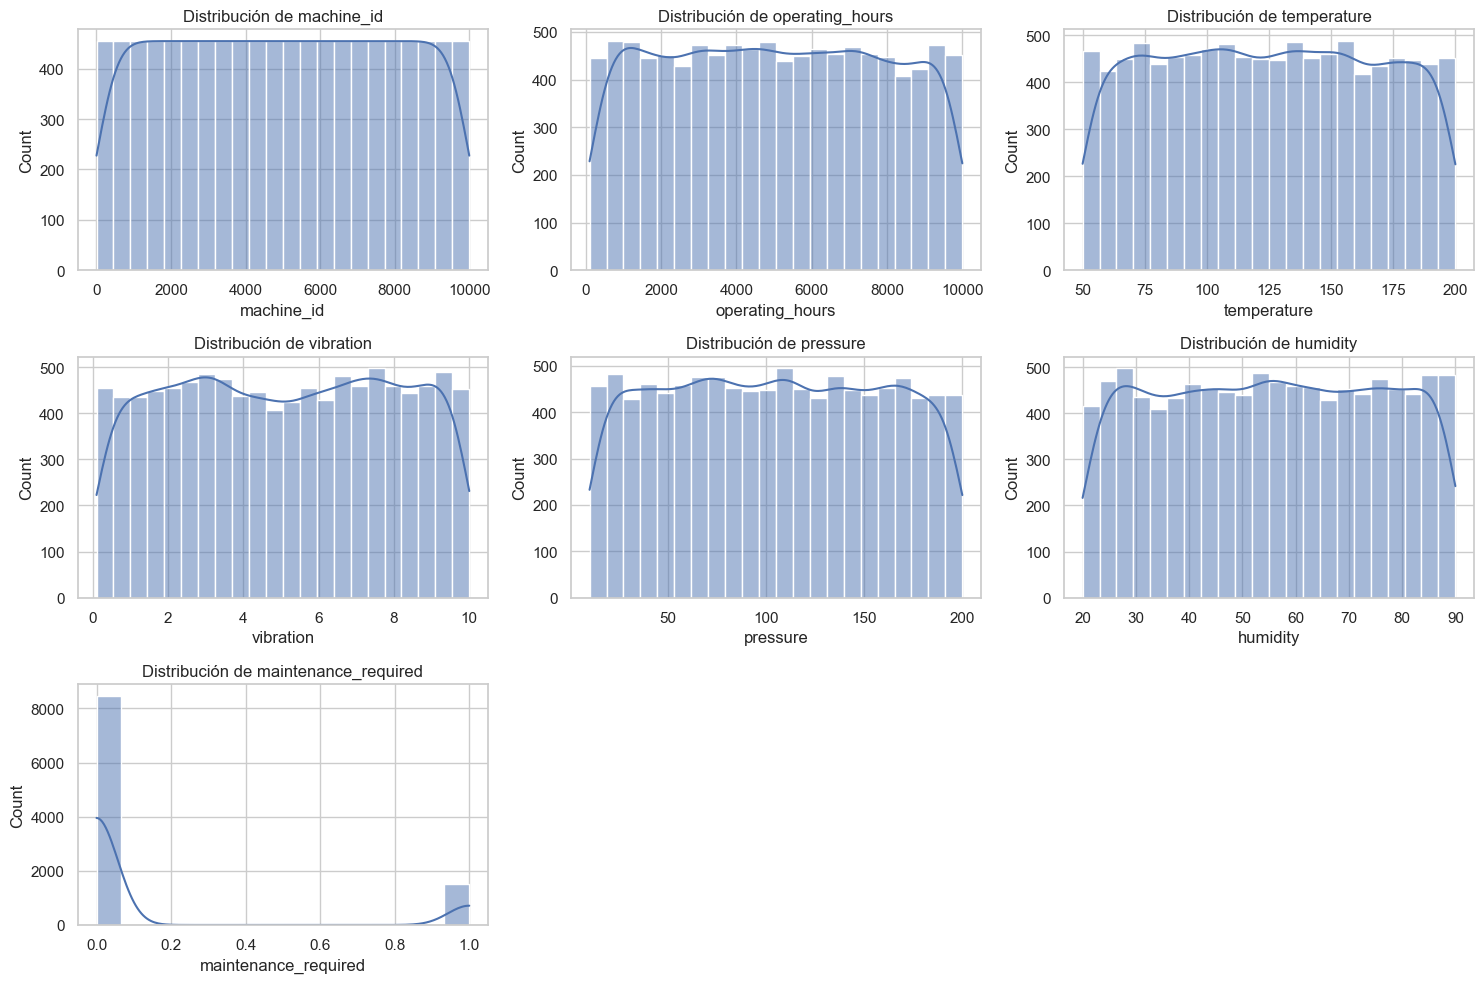

In [5]:
# %% [code]
# Graficamos la distribución de las principales variables numéricas
num_cols = df.select_dtypes(include=['float64', 'int64']).columns  # Selecciona las columnas numéricas

# Configuramos el tamaño de la figura para los histogramas
plt.figure(figsize=(15, 10))

# Iteramos sobre cada columna numérica y creamos un histograma
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)  # Organiza los gráficos en una grilla de 3x3
    sns.histplot(df[col], kde=True)  # Histograma con estimación de densidad
    plt.title(f'Distribución de {col}')  # Título del gráfico

plt.tight_layout()  # Ajusta los espacios para que no se sobrepongan
plt.show()  # Muestra todos los gráficos
